# Sound_Classifier_Neural_Network

In [1]:
import glob
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')

import keras
from keras import models
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import to_categorical
keras.__version__

Using TensorFlow backend.


'2.2.0'

In [2]:
spl = 0

parent_dir = '../data/UrbanSound8K/audio/'
if spl:
    sub_dir = 'samples/'
else:
    sub_dir = 'train/'    
file_name = '*.wav'
files = glob.glob(os.path.join(parent_dir, sub_dir, file_name))
test_files = glob.glob(os.path.join(parent_dir, 'fold10/', file_name))
files[1]

'../data/UrbanSound8K/audio/train\\100652-3-0-1.wav'

In [3]:
def parse_audio(files):
    features, labels = np.empty((0,52)), np.empty(0)
    for file in files:
        # extract label from filename
        labels = np.append(labels, file.split('\\')[1].split('-')[1])
        
        # extract features from audio file
        x, sr = librosa.load(file)
        stft = np.abs(librosa.stft(x))
        mfccs = np.mean(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=40).T, axis=0)
        chroma = np.mean(librosa.feature.chroma_stft(S=stft,sr=sr).T, axis=0)
        feature = np.hstack((mfccs,chroma))
#         print(chroma.shape)
#         print(mfccs.shape)
#         print(feature.shape)
        features = np.vstack((features, feature))
    return np.array(features), np.array(labels, dtype=np.int)

In [4]:
features, labels = parse_audio(files)
train_labels = to_categorical(labels)
print(features.shape)
print(labels.shape)

test_features, test_labels = parse_audio(test_files)
test_labels = to_categorical(test_labels)

In [22]:
np.savetxt('train_features',features)
np.savetxt('train_labels',train_labels)
np.savetxt('test_features',test_features)
np.savetxt('test_labels',test_labels)

# Build and compile model

In [41]:
# model = models.Sequential()
# model.add(layers.Dense(256, activation='relu', input_shape=(52,)))
# model.add(layers.Dense(50, activation='relu'))
# # model.add(layers.Dense(512, activation='relu'))
# model.add(layers.Dense(10, activation='softmax'))

# model.compile(optimizer='Adagrad',
#                 loss='categorical_crossentropy',
#                 metrics=['accuracy'])

model = models.Sequential()

model.add(Dense(256,input_shape=(52,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(optimizer='Adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

## Train model

In [42]:
# from keras.callbacks import TensorBoard
# from keras.utils import plot_model

# tb = TensorBoard(log_dir='./logs',  # log 目录
#                  histogram_freq=1,  # 按照何等频率（epoch）来计算直方图，0为不计算
#                  batch_size=32,     # 用多大量的数据计算直方图
#                  write_graph=True,  # 是否存储网络结构图
#                  write_grads=False, # 是否可视化梯度直方图
#                  write_images=False,# 是否可视化参数
#                  embeddings_freq=0, 
#                  embeddings_layer_names=None, 
#                  embeddings_metadata=None)
# callbacks = [tb]
# history = model.fit(features, train_labels, epochs=50, batch_size=32, validation_data=(test_features, test_labels),callbacks=callbacks)

history = model.fit(features, train_labels, epochs=50, batch_size=32, validation_data=(test_features, test_labels))

Train on 2686 samples, validate on 837 samples
Epoch 1/50
2686/2686 [==============================] - 2s 775us/step - loss: 13.1498 - acc: 0.1322 - val_loss: 8.5091 - val_acc: 0.2593
Epoch 2/50
2686/2686 [==============================] - 1s 242us/step - loss: 12.8031 - acc: 0.1608 - val_loss: 11.7348 - val_acc: 0.1589
Epoch 3/50
2686/2686 [==============================] - 1s 242us/step - loss: 11.8480 - acc: 0.1951 - val_loss: 9.7277 - val_acc: 0.2091
Epoch 4/50
2686/2686 [==============================] - 1s 240us/step - loss: 9.6323 - acc: 0.2074 - val_loss: 2.9280 - val_acc: 0.2151
Epoch 5/50
2686/2686 [==============================] - 1s 294us/step - loss: 4.0753 - acc: 0.1966 - val_loss: 2.2166 - val_acc: 0.2521
Epoch 6/50
2686/2686 [==============================] - 1s 268us/step - loss: 2.4666 - acc: 0.2211 - val_loss: 2.1852 - val_acc: 0.1995
Epoch 7/50
2686/2686 [==============================] - 1s 278us/step - loss: 2.2166 - acc: 0.2405 - val_loss: 2.1598 - val_acc: 0.23

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


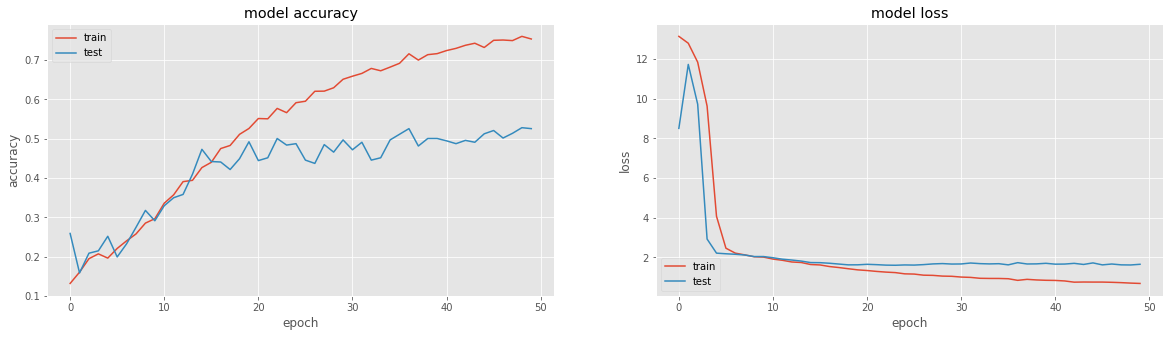

In [48]:
print(history.history.keys())

fig = plt.figure(figsize=(20,5))
plt.subplot(121)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower left')
plt.show()

## Test model

In [49]:
test_loss, test_acc = model.evaluate(test_features, test_labels)
test_acc

837/837 [==============================] - 0s 306us/step


0.5256869772998806